# Загрузка и предобработка данных

In [10]:
import requests
import time

API_KEY = '1b4a189b03e04b4573a8d9981fa56d96'

city_name = 'Moscow'

weather_url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={API_KEY}"

response = requests.get(weather_url)
data = response.json()

if response.status_code == 200:
    lat = data['coord']['lat']
    lon = data['coord']['lon']
    print(f"Координаты города {city_name}: Широта {lat}, Долгота {lon}")

    date_str = '2023-01-01'
    unix_timestamp = int(time.mktime(time.strptime(date_str, '%Y-%m-%d')))

    history_url = f"http://history.openweathermap.org/data/2.5/onecall/timemachine?lat={lat}&lon={lon}&dt={unix_timestamp}&appid={API_KEY}"

    history_response = requests.get(history_url)
    history_data = history_response.json()

    if history_response.status_code == 200:
        print("Исторические данные за выбранную дату:")
        print(history_data)
    else:
        print(f"Ошибка при запросе исторических данных: {history_response.status_code}")
else:
    print(f"Ошибка при запросе данных о городе: {response.status_code}")

Координаты города Moscow: Широта 55.7522, Долгота 37.6156
Ошибка при запросе исторических данных: 401


Так как запросы на получения исторических данных с Openweathermap платные, воспользуемся данными из таблицы

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('/content/weather_data_all_cities.csv')
df

,Город,Дата,Температура,Влажность
0,Москва,2023-08-31 21:00:00,291.14,62
1,Москва,2023-08-31 22:00:00,290.47,69
2,Москва,2023-08-31 23:00:00,289.04,64
3,Москва,2023-09-01 00:00:00,289.74,66
4,Москва,2023-09-01 01:00:00,288.89,67
...,...,...,...,...
43575,Нижний Новгород,2024-08-26 17:00:00,291.88,88
43576,Нижний Новгород,2024-08-26 18:00:00,290.88,94
43577,Нижний Новгород,2024-08-26 19:00:00,289.88,100
43578,Нижний Новгород,2024-08-26 20:00:00,289.88,94


In [49]:
df['Температура'] = df['Температура'] - 273.15

In [50]:
df.dtypes

,0
Город,object
Дата,object
Температура,float64
Влажность,int64


In [51]:
df['Дата'] = pd.to_datetime(df['Дата'])
df.dtypes

,0
Город,object
Дата,datetime64[ns]
Температура,float64
Влажность,int64


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43580 entries, 0 to 43579
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Город        43580 non-null  object        
 1   Дата         43580 non-null  datetime64[ns]
 2   Температура  43580 non-null  float64       
 3   Влажность    43580 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.3+ MB


# Работа с данными

1. Создание столбца с номером квартала



In [53]:
def quater(num):
  if num < 4:
    return 'I'
  elif num < 7:
    return 'II'
  elif num < 10:
    return 'III'
  else:
    return 'IV'

In [54]:
df['Квартал'] = df['Дата'].dt.month.apply(quater)
df

,Город,Дата,Температура,Влажность,Квартал
0,Москва,2023-08-31 21:00:00,17.99,62,III
1,Москва,2023-08-31 22:00:00,17.32,69,III
2,Москва,2023-08-31 23:00:00,15.89,64,III
3,Москва,2023-09-01 00:00:00,16.59,66,III
4,Москва,2023-09-01 01:00:00,15.74,67,III
...,...,...,...,...,...
43575,Нижний Новгород,2024-08-26 17:00:00,18.73,88,III
43576,Нижний Новгород,2024-08-26 18:00:00,17.73,94,III
43577,Нижний Новгород,2024-08-26 19:00:00,16.73,100,III
43578,Нижний Новгород,2024-08-26 20:00:00,16.73,94,III


2. Группировка данных по городам и кварталам и вычисление средней температуры для каждого города за каждый квартал;

Создадим отдельный столбец с годом и будем группировать по кварталам в каждом году по-отдельности

In [55]:
df['Год'] = df['Дата'].dt.year
df

,Город,Дата,Температура,Влажность,Квартал,Год
0,Москва,2023-08-31 21:00:00,17.99,62,III,2023
1,Москва,2023-08-31 22:00:00,17.32,69,III,2023
2,Москва,2023-08-31 23:00:00,15.89,64,III,2023
3,Москва,2023-09-01 00:00:00,16.59,66,III,2023
4,Москва,2023-09-01 01:00:00,15.74,67,III,2023
...,...,...,...,...,...,...
43575,Нижний Новгород,2024-08-26 17:00:00,18.73,88,III,2024
43576,Нижний Новгород,2024-08-26 18:00:00,17.73,94,III,2024
43577,Нижний Новгород,2024-08-26 19:00:00,16.73,100,III,2024
43578,Нижний Новгород,2024-08-26 20:00:00,16.73,94,III,2024


In [56]:
df.groupby(['Город', 'Квартал', 'Год']).agg({'Температура': ['mean']})

Температура
                                    mean
Город           Квартал Год             
Екатеринбург    I       2024  -10.027729
                II      2024   11.144301
                III     2023   12.102875
                        2024   16.740888
                IV      2023   -4.336227
Москва          I       2024   -4.896636
                II      2024   14.395298
                III     2023   15.020206
                        2024   21.051987
                IV      2023    0.172922
Нижний Новгород I       2024   -7.171680
                II      2024   13.565644
                III     2023   13.285736
                        2024   19.141936
                IV      2023   -0.856677
Новосибирск     I       2024  -11.535121
                II      2024   11.581525
                III     2023   10.974952
                        2024   20.006652
                IV      2023   -3.977276
Санкт-Петербург I       2024   -3.759522
                II      2024   12.216509
                III     2023   15.905763
                        2024   19.055509
                IV      2023   -0.309950

Для удобства представим данные в виде другой таблицы

In [57]:
pivot_df = df.pivot_table(
    values='Температура',
    index='Город',
    columns=['Год', 'Квартал'],
    aggfunc='mean'
)

pivot_df

Год                   2023                 2024                      
Квартал                III        IV          I         II        III
Город                                                                
Екатеринбург     12.102875 -4.336227 -10.027729  11.144301  16.740888
Москва           15.020206  0.172922  -4.896636  14.395298  21.051987
Нижний Новгород  13.285736 -0.856677  -7.171680  13.565644  19.141936
Новосибирск      10.974952 -3.977276 -11.535121  11.581525  20.006652
Санкт-Петербург  15.905763 -0.309950  -3.759522  12.216509  19.055509

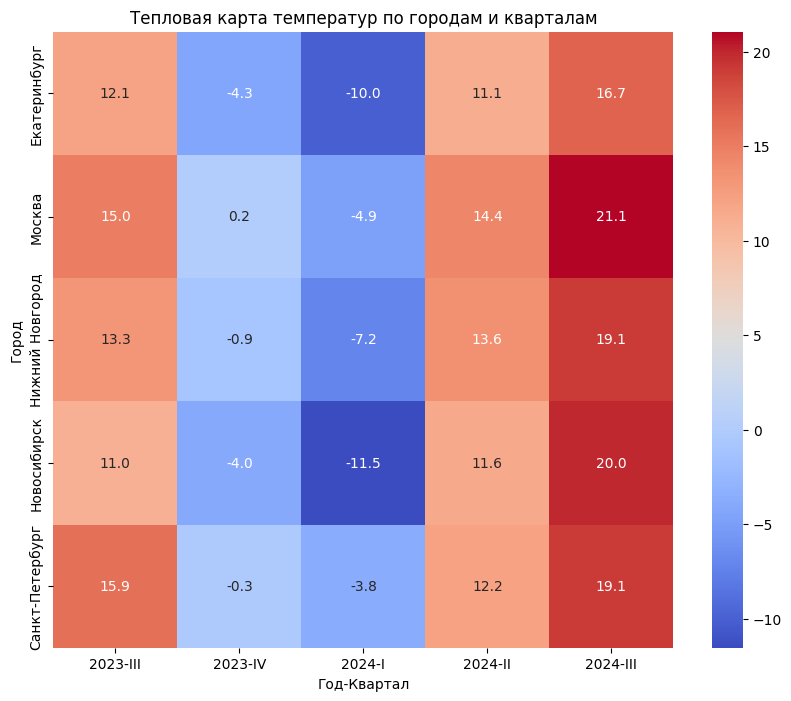

In [58]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap="coolwarm", annot=True, fmt=".1f")
plt.title('Тепловая карта температур по городам и кварталам')
plt.show()

3. Выполнение фильтрации данных для поиска самых холодных и самых теплых дней в
каждом городе

In [59]:
coldest_days = df.loc[df.groupby('Город')['Температура'].idxmin()]
warmest_days = df.loc[df.groupby('Город')['Температура'].idxmax()]

In [60]:
coldest_days

,Город,Дата,Температура,Влажность,Квартал,Год
28519,Екатеринбург,2023-12-08 02:00:00,-40.23,74,IV,2023
3023,Москва,2024-01-04 03:00:00,-26.62,93,I,2024
37939,Нижний Новгород,2024-01-06 06:00:00,-30.27,75,I,2024
19804,Новосибирск,2023-12-08 03:00:00,-39.39,74,IV,2023
11719,Санкт-Петербург,2024-01-03 07:00:00,-27.73,83,I,2024


In [61]:
warmest_days

,Город,Дата,Температура,Влажность,Квартал,Год
33113,Екатеринбург,2024-06-15 09:00:00,32.77,33,II,2024
7426,Москва,2024-07-04 12:00:00,32.96,41,III,2024
42268,Нижний Новгород,2024-07-03 14:00:00,33.73,36,III,2024
24711,Новосибирск,2024-06-28 09:00:00,32.61,38,II,2024
16071,Санкт-Петербург,2024-07-01 13:00:00,32.25,55,III,2024


4. Данные, где температура выше 25°C

In [63]:
data_25 = df[df['Температура']>25].reset_index()
data_25

,index,Город,Дата,Температура,Влажность,Квартал,Год
0,12,Москва,2023-09-01 09:00:00,25.48,42,III,2023
1,13,Москва,2023-09-01 10:00:00,26.19,39,III,2023
2,14,Москва,2023-09-01 11:00:00,26.52,37,III,2023
3,15,Москва,2023-09-01 12:00:00,26.86,33,III,2023
4,16,Москва,2023-09-01 13:00:00,26.52,33,III,2023
...,...,...,...,...,...,...,...
1400,43569,Нижний Новгород,2024-08-26 11:00:00,26.73,44,III,2024
1401,43570,Нижний Новгород,2024-08-26 12:00:00,26.73,44,III,2024
1402,43571,Нижний Новгород,2024-08-26 13:00:00,26.73,47,III,2024
1403,43572,Нижний Новгород,2024-08-26 14:00:00,26.73,47,III,2024
